# Author: Sanjana Raghuwanshi

# Task-01 Prediction Using Supervised ML

Predict the percentage of an student based on the no. of study hours. 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset

url="http://bit.ly/w-data"
dataset = pd.read_csv(url)

dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting of 2-D graph to show the relationship between study hours and percentage

In [43]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


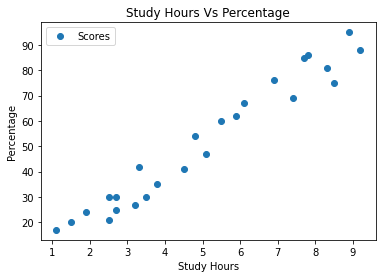

In [50]:
dataset.plot(x='Hours', y='Scores',style='o')
plt.title("Study Hours Vs Percentage")
plt.xlabel("Study Hours")
plt.ylabel("Percentage")
plt.show()

From Graph we can see that it is positive linear relation.

# Preparing Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Now we will split our data for training and testing
Using Scikit-Learn's built-in train_test_split() method

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


# Training

Now we will train our algorithm

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

print('Training Complete')

Training Complete


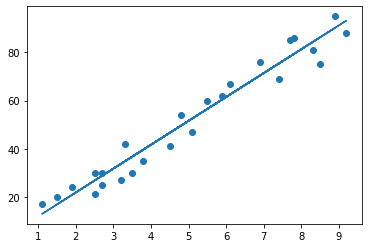

In [36]:
# Plotting Regression Line
line = regression.coef_*X+regression.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Prediction Making

In [37]:
print(X_test)

y_predicted = regression.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
# Comparing predicted value with actual value

df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predicted})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [55]:
# Predicting percentage by given data
hrs = np.array([[9.25]])
res = regression.predict(hrs)

print('Number of hrs student study: {}'.format(hrs))
print('Precentage of student: {}'.format(res))

Number of hrs student study: [[9.25]]
Precentage of student: [93.69173249]


# Checking Accuracy Of Algorithm

In [67]:
train_accu = regression.score(X_train,y_train)*100
print('Train Accuracy: ',train_accu)

test_accu = regression.score(X_test,y_test)*100
print('Test Accuracy: ',test_accu)

Train Accuracy:  95.15510725211553
Test Accuracy:  94.54906892105355


# Evaluating Performance Of Algorithm

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_predicted))
print('r^2 score Error',metrics.r2_score(y_test,y_predicted))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_predicted))

Mean Absolute Error 4.183859899002975
r^2 score Error 0.9454906892105355
Mean Squared Error 21.598769307217406
